In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Uploading data

In [45]:
# Merge mutational data
directory = r'C:\Users\patap\Desktop\Escuela\UW\Praca\Projekt\Corr_analysis\signature_extraction\data'
filename_0 = 'IMMUcan_BC1_norm1.SBS96.all'
df = pd.read_csv(os.path.join(directory, filename_0), sep='\t')

for file in os.listdir(directory)[1:]:
    filename = os.fsdecode(file)
    df_to_merge = pd.read_csv(os.path.join(directory, filename), sep='\t')
    df = pd.merge(df, df_to_merge, how='outer', on='MutationType')

df

,MutationType,IMMU-BC1-0164-FIXT-01-DNA-01_vs_IMMU-BC1-0164-PLA-01-DNA-01,IMMU-BC1-0191-FIXT-03-DNA-01_vs_IMMU-BC1-0191-PXD-01-DNA-01,IMMU-BC1-0213-FIXT-01-DNA-01_vs_IMMU-BC1-0213-PXD-01-DNA-01,IMMU-BC1-0248-FIXT-01-DNA-01_vs_IMMU-BC1-0248-PXD-04-DNA-01,IMMU-BC1-0297-FIXT-01-DNA-01_vs_IMMU-BC1-0297-PXD-01-DNA-01,IMMU-BC1-0297-FIXT-02-DNA-01_vs_IMMU-BC1-0297-PXD-01-DNA-01,IMMU-BC1-0327-FIXT-01-DNA-01_vs_IMMU-BC1-0327-PXD-01-DNA-01,IMMU-BC1-0327-FIXT-02-DNA-01_vs_IMMU-BC1-0327-PXD-01-DNA-01,IMMU-BC1-0329-FIXT-01-DNA-01_vs_IMMU-BC1-0329-PXD-01-DNA-01,...,SYNG-BC1-1593-FIXT-01-DNA-01_vs_SYNG-BC1-1593-BL_OTHER-01-DNA-01,SYNG-BC1-1594-FIXT-01-DNA-01_vs_SYNG-BC1-1594-BL_OTHER-01-DNA-01,SYNG-BC1-1595-FIXT-01-DNA-01_vs_SYNG-BC1-1595-BL_OTHER-01-DNA-01,SYNG-BC1-1596-FIXT-01-DNA-01_vs_SYNG-BC1-1596-BL_OTHER-01-DNA-01,SYNG-BC1-1597-FIXT-01-DNA-01_vs_SYNG-BC1-1597-BL_OTHER-01-DNA-01,SYNG-BC1-1599-FIXT-01-DNA-01_vs_SYNG-BC1-1599-BL_OTHER-01-DNA-01,SYNG-BC1-1600-FIXT-01-DNA-01_vs_SYNG-BC1-1600-BL_OTHER-01-DNA-01,SYNG-BC1-1601-FIXT-01-DNA-01_vs_SYNG-BC1-1601-BL_OTHER-01-DNA-01,SYNG-BC1-1602-FIXT-01-DNA-01_vs_SYNG-BC1-1602-BL_OTHER-01-DNA-01,SYNG-BC1-1603-FIXT-01-DNA-01_vs_SYNG-BC1-1603-BL_OTHER-01-DNA-01
0,A[C>A]A,5.434479,6.933501,6.791066,3.056087,1.613489,1.619836,1.404484,0.000000,3.121710,...,1.308907,2.867227,1.584612,1.297691,3.514170,0.000000,1.585565,1.444281,1.372752,1.500549
1,A[C>A]C,8.353665,0.947369,5.567444,0.000000,2.206898,1.107790,0.960512,0.000000,0.000000,...,0.895148,0.980434,0.000000,2.662434,1.201653,0.000000,0.000000,0.000000,0.000000,0.000000
2,A[C>A]G,0.473108,1.448659,1.891865,0.000000,0.000000,0.563403,0.000000,0.000000,0.000000,...,0.455257,0.000000,0.551151,0.000000,0.000000,0.000000,0.551482,0.502342,0.000000,0.000000
3,A[C>A]T,8.032549,8.198569,1.338358,0.000000,0.000000,1.605032,0.000000,0.000000,0.000000,...,0.000000,1.420511,0.000000,2.571662,0.000000,0.000000,0.000000,0.000000,1.360205,1.486834
4,A[C>G]A,5.434479,5.546800,2.716427,1.528044,1.613489,1.619836,2.808967,2.834809,1.560855,...,0.000000,1.433613,0.000000,0.000000,0.000000,2.324795,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,T[T>C]T,4.727975,4.825694,0.000000,0.000000,2.818857,2.829945,2.453712,2.476286,2.726902,...,0.000000,5.009206,0.000000,4.534280,3.069726,0.000000,0.000000,0.000000,0.000000,0.000000
92,T[T>G]A,2.827370,2.885807,0.000000,0.000000,0.000000,6.787277,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.156186,0.000000,0.000000,0.000000,0.000000,0.000000,3.143725
93,T[T>G]C,1.149379,0.000000,0.000000,0.000000,2.735999,2.746762,1.190794,1.201749,0.000000,...,0.000000,1.215491,0.000000,1.100250,1.489747,0.000000,2.688647,0.000000,1.163890,0.000000
94,T[T>G]G,2.602982,2.656782,0.000000,0.000000,0.000000,1.560207,0.000000,0.000000,0.000000,...,1.260724,1.380839,1.526279,1.249921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
# Change column names for better comparison with expression data
df.columns = [colname.split('_')[0].replace('-', '_').replace('D', 'X') for colname in df.columns]
df

,MutationType,IMMU_BC1_0164_FIXT_01_XNA_01,IMMU_BC1_0191_FIXT_03_XNA_01,IMMU_BC1_0213_FIXT_01_XNA_01,IMMU_BC1_0248_FIXT_01_XNA_01,IMMU_BC1_0297_FIXT_01_XNA_01,IMMU_BC1_0297_FIXT_02_XNA_01,IMMU_BC1_0327_FIXT_01_XNA_01,IMMU_BC1_0327_FIXT_02_XNA_01,IMMU_BC1_0329_FIXT_01_XNA_01,...,SYNG_BC1_1593_FIXT_01_XNA_01,SYNG_BC1_1594_FIXT_01_XNA_01,SYNG_BC1_1595_FIXT_01_XNA_01,SYNG_BC1_1596_FIXT_01_XNA_01,SYNG_BC1_1597_FIXT_01_XNA_01,SYNG_BC1_1599_FIXT_01_XNA_01,SYNG_BC1_1600_FIXT_01_XNA_01,SYNG_BC1_1601_FIXT_01_XNA_01,SYNG_BC1_1602_FIXT_01_XNA_01,SYNG_BC1_1603_FIXT_01_XNA_01
0,A[C>A]A,5.434479,6.933501,6.791066,3.056087,1.613489,1.619836,1.404484,0.000000,3.121710,...,1.308907,2.867227,1.584612,1.297691,3.514170,0.000000,1.585565,1.444281,1.372752,1.500549
1,A[C>A]C,8.353665,0.947369,5.567444,0.000000,2.206898,1.107790,0.960512,0.000000,0.000000,...,0.895148,0.980434,0.000000,2.662434,1.201653,0.000000,0.000000,0.000000,0.000000,0.000000
2,A[C>A]G,0.473108,1.448659,1.891865,0.000000,0.000000,0.563403,0.000000,0.000000,0.000000,...,0.455257,0.000000,0.551151,0.000000,0.000000,0.000000,0.551482,0.502342,0.000000,0.000000
3,A[C>A]T,8.032549,8.198569,1.338358,0.000000,0.000000,1.605032,0.000000,0.000000,0.000000,...,0.000000,1.420511,0.000000,2.571662,0.000000,0.000000,0.000000,0.000000,1.360205,1.486834
4,A[C>G]A,5.434479,5.546800,2.716427,1.528044,1.613489,1.619836,2.808967,2.834809,1.560855,...,0.000000,1.433613,0.000000,0.000000,0.000000,2.324795,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,T[T>C]T,4.727975,4.825694,0.000000,0.000000,2.818857,2.829945,2.453712,2.476286,2.726902,...,0.000000,5.009206,0.000000,4.534280,3.069726,0.000000,0.000000,0.000000,0.000000,0.000000
92,T[T>G]A,2.827370,2.885807,0.000000,0.000000,0.000000,6.787277,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.156186,0.000000,0.000000,0.000000,0.000000,0.000000,3.143725
93,T[T>G]C,1.149379,0.000000,0.000000,0.000000,2.735999,2.746762,1.190794,1.201749,0.000000,...,0.000000,1.215491,0.000000,1.100250,1.489747,0.000000,2.688647,0.000000,1.163890,0.000000
94,T[T>G]G,2.602982,2.656782,0.000000,0.000000,0.000000,1.560207,0.000000,0.000000,0.000000,...,1.260724,1.380839,1.526279,1.249921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
df.set_index('MutationType', inplace=True)
df

,IMMU_BC1_0164_FIXT_01_XNA_01,IMMU_BC1_0191_FIXT_03_XNA_01,IMMU_BC1_0213_FIXT_01_XNA_01,IMMU_BC1_0248_FIXT_01_XNA_01,IMMU_BC1_0297_FIXT_01_XNA_01,IMMU_BC1_0297_FIXT_02_XNA_01,IMMU_BC1_0327_FIXT_01_XNA_01,IMMU_BC1_0327_FIXT_02_XNA_01,IMMU_BC1_0329_FIXT_01_XNA_01,IMMU_BC1_0367_FIXT_02_XNA_01,...,SYNG_BC1_1593_FIXT_01_XNA_01,SYNG_BC1_1594_FIXT_01_XNA_01,SYNG_BC1_1595_FIXT_01_XNA_01,SYNG_BC1_1596_FIXT_01_XNA_01,SYNG_BC1_1597_FIXT_01_XNA_01,SYNG_BC1_1599_FIXT_01_XNA_01,SYNG_BC1_1600_FIXT_01_XNA_01,SYNG_BC1_1601_FIXT_01_XNA_01,SYNG_BC1_1602_FIXT_01_XNA_01,SYNG_BC1_1603_FIXT_01_XNA_01
MutationType,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,5.434479,6.933501,6.791066,3.056087,1.613489,1.619836,1.404484,0.000000,3.121710,4.422171,...,1.308907,2.867227,1.584612,1.297691,3.514170,0.000000,1.585565,1.444281,1.372752,1.500549
A[C>A]C,8.353665,0.947369,5.567444,0.000000,2.206898,1.107790,0.960512,0.000000,0.000000,3.024278,...,0.895148,0.980434,0.000000,2.662434,1.201653,0.000000,0.000000,0.000000,0.000000,0.000000
A[C>A]G,0.473108,1.448659,1.891865,0.000000,0.000000,0.563403,0.000000,0.000000,0.000000,0.000000,...,0.455257,0.000000,0.551151,0.000000,0.000000,0.000000,0.551482,0.502342,0.000000,0.000000
A[C>A]T,8.032549,8.198569,1.338358,0.000000,0.000000,1.605032,0.000000,0.000000,0.000000,1.460585,...,0.000000,1.420511,0.000000,2.571662,0.000000,0.000000,0.000000,0.000000,1.360205,1.486834
A[C>G]A,5.434479,5.546800,2.716427,1.528044,1.613489,1.619836,2.808967,2.834809,1.560855,2.948114,...,0.000000,1.433613,0.000000,0.000000,0.000000,2.324795,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,4.727975,4.825694,0.000000,0.000000,2.818857,2.829945,2.453712,2.476286,2.726902,0.000000,...,0.000000,5.009206,0.000000,4.534280,3.069726,0.000000,0.000000,0.000000,0.000000,0.000000
T[T>G]A,2.827370,2.885807,0.000000,0.000000,0.000000,6.787277,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.156186,0.000000,0.000000,0.000000,0.000000,0.000000,3.143725
T[T>G]C,1.149379,0.000000,0.000000,0.000000,2.735999,2.746762,1.190794,1.201749,0.000000,0.000000,...,0.000000,1.215491,0.000000,1.100250,1.489747,0.000000,2.688647,0.000000,1.163890,0.000000


In [49]:
# Import expression data
exp_filepath = r'C:\Users\patap\Desktop\Escuela\UW\Praca\Projekt\Corr_analysis\expression_data' + r'\brca_normalized_counts_pid.tsv'
exp_df = pd.read_csv(exp_filepath, sep='\t', index_col=0)
exp_df

,IMMU_BC1_0164_FIXT_01_RNA_01,IMMU_BC1_0191_FIXT_03_RNA_01,IMMU_BC1_0213_FIXT_01_RNA_01,IMMU_BC1_0248_FIXT_01_RNA_01,IMMU_BC1_0297_FIXT_02_RNA_01,IMMU_BC1_0319_FIXT_01_RNA_01,IMMU_BC1_0327_FIXT_01_RNA_01,IMMU_BC1_0327_FIXT_02_RNA_01,IMMU_BC1_0329_FIXT_01_RNA_01,IMMU_BC1_0422_FIXT_01_RNA_01,...,SYNG_BC1_1594_FIXT_01_RNA_01,SYNG_BC1_1595_FIXT_01_RNA_01,SYNG_BC1_1596_FIXT_01_RNA_01,SYNG_BC1_1597_FIXT_01_RNA_01,SYNG_BC1_1599_FIXT_01_RNA_01,SYNG_BC1_1600_FIXT_01_RNA_01,SYNG_BC1_1601_FIXT_01_RNA_01,SYNG_BC1_1601_FIXT_02_RNA_01,SYNG_BC1_1602_FIXT_01_RNA_01,SYNG_BC1_1603_FIXT_01_RNA_01
ENSG00000000003.14,11.438809,10.844601,10.449200,9.965270,10.512825,9.239324,9.849534,9.366960,10.397868,10.359475,...,10.171482,10.292627,8.975080,9.033530,9.248403,11.954860,8.421564,8.866461,10.252367,10.637464
ENSG00000000005.5,4.923519,NaN,NaN,NaN,4.651063,4.781850,5.276374,NaN,NaN,6.859511,...,NaN,NaN,NaN,NaN,NaN,5.423932,NaN,NaN,NaN,NaN
ENSG00000000419.12,10.433515,9.724172,10.471991,10.810401,11.141645,10.239318,10.312896,9.879641,10.275766,10.198196,...,9.923508,9.969399,10.043839,10.341597,9.536214,10.343972,9.864755,9.801994,10.183760,9.724443
ENSG00000000457.13,11.302197,9.829488,10.356480,10.818165,10.520832,10.957785,10.570745,10.600325,10.764708,11.378916,...,11.757163,11.006100,10.976456,10.351318,11.477552,10.813514,11.064037,11.262685,12.561329,11.292136
ENSG00000000460.16,10.699993,10.591843,10.271628,10.869074,10.427375,10.660090,9.987349,10.389063,9.854963,11.563653,...,10.593006,10.655576,9.353351,9.820179,9.566333,9.924168,9.373019,9.098653,9.736626,9.917300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285990.1,5.213980,5.455887,4.735039,NaN,4.807436,4.781850,4.578903,NaN,NaN,4.575313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.754845
ENSG00000285991.1,5.765611,5.982513,5.188694,5.500357,5.500323,5.392260,5.508288,4.997326,5.189509,6.063464,...,6.064945,5.720814,6.030252,NaN,4.957933,NaN,4.951988,NaN,5.552263,6.892558
ENSG00000285992.1,NaN,NaN,NaN,NaN,4.651063,4.566468,NaN,NaN,NaN,4.947950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000285993.1,NaN,4.595116,NaN,NaN,NaN,NaN,4.578903,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Change column names for better comparison with mutational data
exp_df.columns = [colname.replace('R', 'X') for colname in exp_df.columns]
exp_df

,IMMU_BC1_0164_FIXT_01_XNA_01,IMMU_BC1_0191_FIXT_03_XNA_01,IMMU_BC1_0213_FIXT_01_XNA_01,IMMU_BC1_0248_FIXT_01_XNA_01,IMMU_BC1_0297_FIXT_02_XNA_01,IMMU_BC1_0319_FIXT_01_XNA_01,IMMU_BC1_0327_FIXT_01_XNA_01,IMMU_BC1_0327_FIXT_02_XNA_01,IMMU_BC1_0329_FIXT_01_XNA_01,IMMU_BC1_0422_FIXT_01_XNA_01,...,SYNG_BC1_1594_FIXT_01_XNA_01,SYNG_BC1_1595_FIXT_01_XNA_01,SYNG_BC1_1596_FIXT_01_XNA_01,SYNG_BC1_1597_FIXT_01_XNA_01,SYNG_BC1_1599_FIXT_01_XNA_01,SYNG_BC1_1600_FIXT_01_XNA_01,SYNG_BC1_1601_FIXT_01_XNA_01,SYNG_BC1_1601_FIXT_02_XNA_01,SYNG_BC1_1602_FIXT_01_XNA_01,SYNG_BC1_1603_FIXT_01_XNA_01
ENSG00000000003.14,11.438809,10.844601,10.449200,9.965270,10.512825,9.239324,9.849534,9.366960,10.397868,10.359475,...,10.171482,10.292627,8.975080,9.033530,9.248403,11.954860,8.421564,8.866461,10.252367,10.637464
ENSG00000000005.5,4.923519,NaN,NaN,NaN,4.651063,4.781850,5.276374,NaN,NaN,6.859511,...,NaN,NaN,NaN,NaN,NaN,5.423932,NaN,NaN,NaN,NaN
ENSG00000000419.12,10.433515,9.724172,10.471991,10.810401,11.141645,10.239318,10.312896,9.879641,10.275766,10.198196,...,9.923508,9.969399,10.043839,10.341597,9.536214,10.343972,9.864755,9.801994,10.183760,9.724443
ENSG00000000457.13,11.302197,9.829488,10.356480,10.818165,10.520832,10.957785,10.570745,10.600325,10.764708,11.378916,...,11.757163,11.006100,10.976456,10.351318,11.477552,10.813514,11.064037,11.262685,12.561329,11.292136
ENSG00000000460.16,10.699993,10.591843,10.271628,10.869074,10.427375,10.660090,9.987349,10.389063,9.854963,11.563653,...,10.593006,10.655576,9.353351,9.820179,9.566333,9.924168,9.373019,9.098653,9.736626,9.917300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285990.1,5.213980,5.455887,4.735039,NaN,4.807436,4.781850,4.578903,NaN,NaN,4.575313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.754845
ENSG00000285991.1,5.765611,5.982513,5.188694,5.500357,5.500323,5.392260,5.508288,4.997326,5.189509,6.063464,...,6.064945,5.720814,6.030252,NaN,4.957933,NaN,4.951988,NaN,5.552263,6.892558
ENSG00000285992.1,NaN,NaN,NaN,NaN,4.651063,4.566468,NaN,NaN,NaN,4.947950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000285993.1,NaN,4.595116,NaN,NaN,NaN,NaN,4.578903,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean mutations data

In [51]:
# Load list of uneligable patients
pat_filepath = r'C:\Users\patap\Desktop\Escuela\UW\Praca\Projekt\Corr_analysis\expression_data\counts\patients_to_drop.txt'
patients_to_drop = [patient.strip().replace('R', 'X') for patient in open(pat_filepath, 'r')]
len(patients_to_drop)

74

In [52]:
# Remove duplicates
mut_df = df.loc[:,~df.columns.duplicated()]
mut_df.shape[1]

728

In [53]:
# Remove uneligable patients
patients_to_stay = [patient for patient in mut_df.columns if patient not in patients_to_drop]
mut_df = mut_df[patients_to_stay]
mut_df.shape[1]

669

In [54]:
# Check for missing samples
mut_missing = [sample.replace('XNA', 'DNA') for sample in exp_df.columns if sample not in mut_df.columns]
print(f'Missing mutational data patients: {mut_missing}')
print(f'Number: {len(mut_missing)}')
exp_missing = [sample.replace('XNA', 'RNA') for sample in mut_df.columns if sample not in exp_df.columns]
print(f'Missing expression data patients: {exp_missing}')
print(f'Number: {len(exp_missing)}')

Missing mutational data patients: ['IMMU_BC1_0319_FIXT_01_DNA_01', 'IMMU_BC1_2156_FIXT_01_DNA_01', 'IMMU_BC1_2212_FIXT_01_DNA_01', 'IMMU_BC1_2234_FIXT_01_DNA_01', 'IMMU_BC1_2344_FIXT_01_DNA_01', 'IMMU_BC1_2353_FIXT_01_DNA_01', 'IMMU_BC1_2374_FIXT_03_DNA_01', 'IMMU_BC2_0118_FIXT_02_DNA_01', 'IMMU_BC2_0140_FIXT_03_DNA_01', 'IMMU_BC2_0149_FIXT_02_DNA_01', 'IMMU_BC2_0210_FIXT_01_DNA_01', 'IMMU_BC2_0218_FIXT_02_DNA_01', 'IMMU_BC2_0261_FIXT_01_DNA_01', 'IMMU_BC2_0356_FIXT_02_DNA_01', 'IMMU_BC2_1134_FIXT_01_DNA_01', 'IMMU_BC2_1134_FIXT_02_DNA_01', 'IMMU_BC2_1171_FIXT_01_DNA_01', 'IMMU_BC2_1298_FIXT_01_DNA_02', 'IMMU_BC2_1298_FIXT_02_DNA_01', 'IMMU_BC2_1299_FIXT_01_DNA_02', 'IMMU_BC2_1300_FIXT_01_DNA_02', 'IMMU_BC2_1303_FIXT_01_DNA_02', 'IMMU_BC2_1331_FIXT_01_DNA_02', 'IMMU_BC2_1333_FIXT_01_DNA_02', 'IMMU_BC2_1346_FIXT_01_DNA_03', 'IMMU_BC2_1709_FIXT_01_DNA_01', 'IMMU_BC2_1839_FIXT_01_DNA_01', 'IMMU_BC2_1851_FIXT_01_DNA_01', 'IMMU_BC2_2051_FIXT_01_DNA_01', 'IMMU_BC2_2079_FIXT_01_DNA_01', 'IMMU

In [ ]:
# Check for missing samples, but take different samples from the same patient as the same sample
# mut_cols = mut_df.columns
# mut_cols_short = ['_'.join(col.split('_')[:5]) for col in mut_cols]
# exp_cols = exp_df.columns
# exp_cols_short = ['_'.join(col.split('_')[:5]) for col in exp_cols]

# mut_missing = []
# exp_missing = []

# for col in exp_cols:
#     if col not in mut_cols:
#         col_short = '_'.join(col.split('_')[:5])
#         if col_short not in mut_cols_short:
#             mut_missing.append(col.replace('XNA', 'DNA'))

# print(f'Missing mutational data patients: {mut_missing}')
# print(f'Number: {len(mut_missing)}')

# for col in mut_cols:
#     if col not in exp_cols:
#         col_short = '_'.join(col.split('_')[:5])
#         if col_short not in exp_cols_short:
#             exp_missing.append(col.replace('XNA', 'RNA'))

# print(f'Missing expression data patients: {exp_missing}')
# print(f'Number: {len(exp_missing)}')

Missing mutational data patients: ['IMMU_BC1_0319_FIXT_01_DNA_01', 'IMMU_BC1_2156_FIXT_01_DNA_01', 'IMMU_BC1_2212_FIXT_01_DNA_01', 'IMMU_BC1_2234_FIXT_01_DNA_01', 'IMMU_BC1_2344_FIXT_01_DNA_01', 'IMMU_BC1_2353_FIXT_01_DNA_01', 'IMMU_BC1_2374_FIXT_03_DNA_01', 'IMMU_BC2_0118_FIXT_02_DNA_01', 'IMMU_BC2_0140_FIXT_03_DNA_01', 'IMMU_BC2_0149_FIXT_02_DNA_01', 'IMMU_BC2_0210_FIXT_01_DNA_01', 'IMMU_BC2_0218_FIXT_02_DNA_01', 'IMMU_BC2_0261_FIXT_01_DNA_01', 'IMMU_BC2_0356_FIXT_02_DNA_01', 'IMMU_BC2_1134_FIXT_01_DNA_01', 'IMMU_BC2_1134_FIXT_02_DNA_01', 'IMMU_BC2_1171_FIXT_01_DNA_01', 'IMMU_BC2_1298_FIXT_02_DNA_01', 'IMMU_BC2_1331_FIXT_01_DNA_02', 'IMMU_BC2_1709_FIXT_01_DNA_01', 'IMMU_BC2_1839_FIXT_01_DNA_01', 'IMMU_BC2_1851_FIXT_01_DNA_01', 'IMMU_BC2_2051_FIXT_01_DNA_01', 'IMMU_BC2_2079_FIXT_01_DNA_01', 'IMMU_BC2_2083_FIXT_01_DNA_01', 'IMMU_BC2_2086_FIXT_01_DNA_01', 'IMMU_BC2_2087_FIXT_01_DNA_01', 'IMMU_BC2_2096_FIXT_01_DNA_01', 'IMMU_BC2_2102_FIXT_01_DNA_01', 'IMMU_BC2_2105_FIXT_01_DNA_01', 'IMMU

In [55]:
# Save missing samples IDs (with different samples from the same patient as separate samples)
with open('info/mutational_data_missing.txt', 'w') as f:
    for sample in mut_missing: f.write(f'{sample}\n')
    
with open('info/expression_data_missing.txt', 'w') as f:
    for sample in exp_missing: f.write(f'{sample}\n')

In [ ]:
# Drop patients missing expression data
# mut_df.drop(columns=exp_missing, inplace=True)
# mut_df.shape[1]

In [56]:
# Save merged mutations dataframe
mut_df.to_csv('results/mutations_data_clean_merged.tsv', sep='\t')

# **Signature extraction** (for patients present in both datasets only)

In [2]:
from SigProfilerMatrixGenerator import install as genInstall

# genInstall.install('GRCh38')

# Refitting to COSMIC database

In [ ]:
# Choose signature subgrups to exclude OR ...
exclude_signature_subgroups = [ # 'MMR_deficiency_signatures',
                            #    'POL_deficiency_signatures', 
                            #    'HR_deficiency_signatures' ,
                            #    'BER_deficiency_signatures', 
                               'Chemotherapy_signatures',
                               'Immunosuppressants_signatures',
                               'Treatment_signatures',  
                            #    'APOBEC_signatures',
                               'Tobacco_signatures',
                               'UV_signatures',
                               'AA_signatures',
                               'Colibactin_signatures',
                               'Artifact_signatures'
                            #    'Lymphoid_signatures'  
                                ]

**Signatures to keep:** 

SBS1, SBS2, SBS3, SBS5, SBS13, SBS15, SBS18/*, SBS20, SBS26, */SBS36 (single patients), SBS39, SBS40a, SBS40b, SBS40c, SBS44, SBS98 (single patient)

SBS8 (proposed: HR/NER deficiency), SBS9 (polymerase n activity) - keep?

In [3]:
# ... Choose a custom COSMIC signature list
# Choose if to use exome normalized signatures or whole genome signatures
exome = True

signature_list = ['SBS1','SBS2','SBS3','SBS5','SBS8','SBS9','SBS13','SBS15','SBS18','SBS20',
                  'SBS26','SBS36','SBS39','SBS40a','SBS40b','SBS40c','SBS44','SBS98']

if exome:
    sig_filepath = r'C:\Users\patap\Desktop\Escuela\UW\Praca\Projekt\.venv\Lib\site-packages\SigProfilerAssignment\data\Reference_Signatures\GRCh38\COSMIC_v3.4_SBS_GRCh38_exome.txt'
else:
    sig_filepath = r'C:\Users\patap\Desktop\Escuela\UW\Praca\Projekt\.venv\Lib\site-packages\SigProfilerAssignment\data\Reference_Signatures\GRCh38\COSMIC_v3.4_SBS_GRCh38.txt'

signature_database = pd.read_csv(sig_filepath, sep='\t', index_col=0)
signature_database[signature_list].to_csv('results/custom_signature_database.tsv', sep='\t')

In [4]:
from SigProfilerAssignment import Analyzer as Analyze


# Extract signatures from merged cohort mutational data
# There is no difference is exposures between extracting signatures from
# separate cohorts vs merged cohorts
Analyze.cosmic_fit('results/mutations_data_clean_merged.tsv', 'refitting_results',
                   input_type="matrix", context_type="96",
                   collapse_to_SBS96=True, cosmic_version=3.4, exome=False,  # exome=True lowers SBS1 presence by approx. 30%
                   genome_build="GRCh38", signature_database='results/custom_signature_database.tsv',  # custom=database, default=None
                   exclude_signature_subgroups=None,  # default=exclude_signature_subgrups, custom=None
                   export_probabilities=False,
                   export_probabilities_per_mutation=False, make_plots=False,
                   sample_reconstruction_plots=False, verbose=False)

Assigning COSMIC sigs or Signature Database ...... 
|████████████████████████████████████████| 669/669 [100%] in 1:57.9 (5.67/s) 


 
Your Job Is Successfully Completed! Thank You For Using SigProfilerAssignment.
 


In [2]:
# Import merged signature exposures
signatures_merged_df = pd.read_csv('refitting_results/Assignment_Solution/Activities/Assignment_Solution_Activities.txt',
                                   sep='\t', index_col=0)
signatures_merged_df

,SBS1,SBS2,SBS3,SBS5,SBS8,SBS9,SBS13,SBS15,SBS18,SBS20,SBS26,SBS36,SBS39,SBS40a,SBS40b,SBS40c,SBS44,SBS98
Samples,,,,,,,,,,,,,,,,,,
IMMU_BC1_0164_FIXT_01_XNA_01,0,0,0,41,0,0,0,0,0,0,0,0,0,0,197,195,0,0
IMMU_BC1_0191_FIXT_03_XNA_01,0,0,0,60,56,0,0,0,0,0,0,0,95,0,0,0,0,0
IMMU_BC1_0213_FIXT_01_XNA_01,0,15,123,26,0,0,16,0,0,0,0,0,0,0,0,0,0,0
IMMU_BC1_0248_FIXT_01_XNA_01,2,11,0,7,0,0,5,0,0,0,0,0,0,0,0,52,0,0
IMMU_BC1_0297_FIXT_02_XNA_01,1,0,0,150,0,0,0,0,0,0,0,0,0,54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYNG_BC1_1599_FIXT_01_XNA_01,72,27,0,0,0,0,0,0,0,0,0,0,0,79,0,0,0,0
SYNG_BC1_1600_FIXT_01_XNA_01,6,0,0,7,0,0,0,0,0,0,0,0,0,0,0,141,0,0
SYNG_BC1_1601_FIXT_01_XNA_01,0,55,0,78,0,0,85,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Drop signatures present in less than 10 patients
# signatures_merged_df_drop0 = signatures_merged_df.loc[:, (signatures_merged_df > 0).sum(axis=0) > 10]
# signatures_merged_df_drop0.shape

(669, 26)

In [4]:
# Drop signatures, which total exposure value is less than 600
# signatures_merged_df_drop0 = signatures_merged_df.loc[:, signatures_merged_df.sum(axis=0) > 600]
# signatures_merged_df_drop0.shape

(669, 23)

In [3]:
# Drop 0 values 
signatures_merged_df_drop0 = signatures_merged_df[signatures_merged_df > 0]

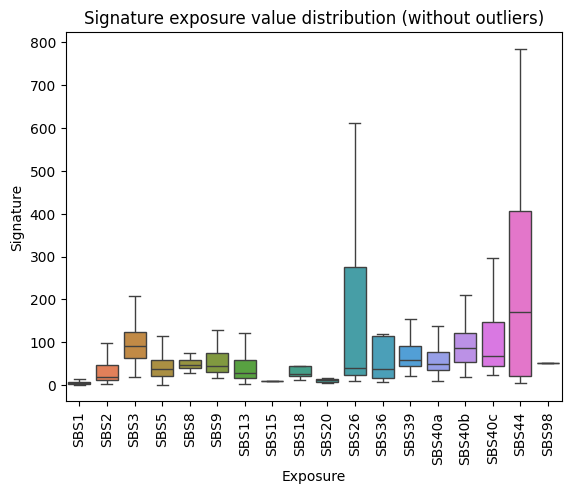

In [4]:
# Boxplot of signature exposure values (without outliers)
sns.boxplot(data=signatures_merged_df_drop0, orient='v', showfliers=False)
plt.title('Signature exposure value distribution (without outliers)')
plt.xlabel('Exposure')
plt.ylabel('Signature')
plt.xticks(rotation=90)
plt.show()

Really low SBS1 values... Possible mutation snatching?
(Should we drop 0s? - only with comparison to the barplot)

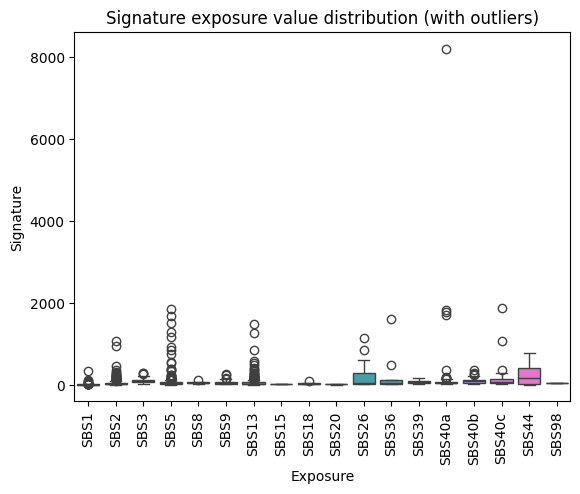

In [5]:
# Boxplot of signature exposure values (with outliers)
sns.boxplot(data=signatures_merged_df_drop0, orient='v')
plt.title('Signature exposure value distribution (with outliers)')
plt.xlabel('Exposure')
plt.ylabel('Signature')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Group samples by cohort
samples_grouped = signatures_merged_df.groupby(signatures_merged_df.index.str[:8]).apply(lambda group: list(group.index))
samples_grouped

Samples
IMMU_BC1    [IMMU_BC1_0164_FIXT_01_XNA_01, IMMU_BC1_0191_F...
IMMU_BC2    [IMMU_BC2_0118_FIXT_01_XNA_01, IMMU_BC2_0130_F...
IMMU_BC3    [IMMU_BC3_0098_FIXT_01_XNA_01, IMMU_BC3_0098_F...
SYNG_BC1    [SYNG_BC1_1520_FIXT_01_XNA_01, SYNG_BC1_1521_F...
dtype: object

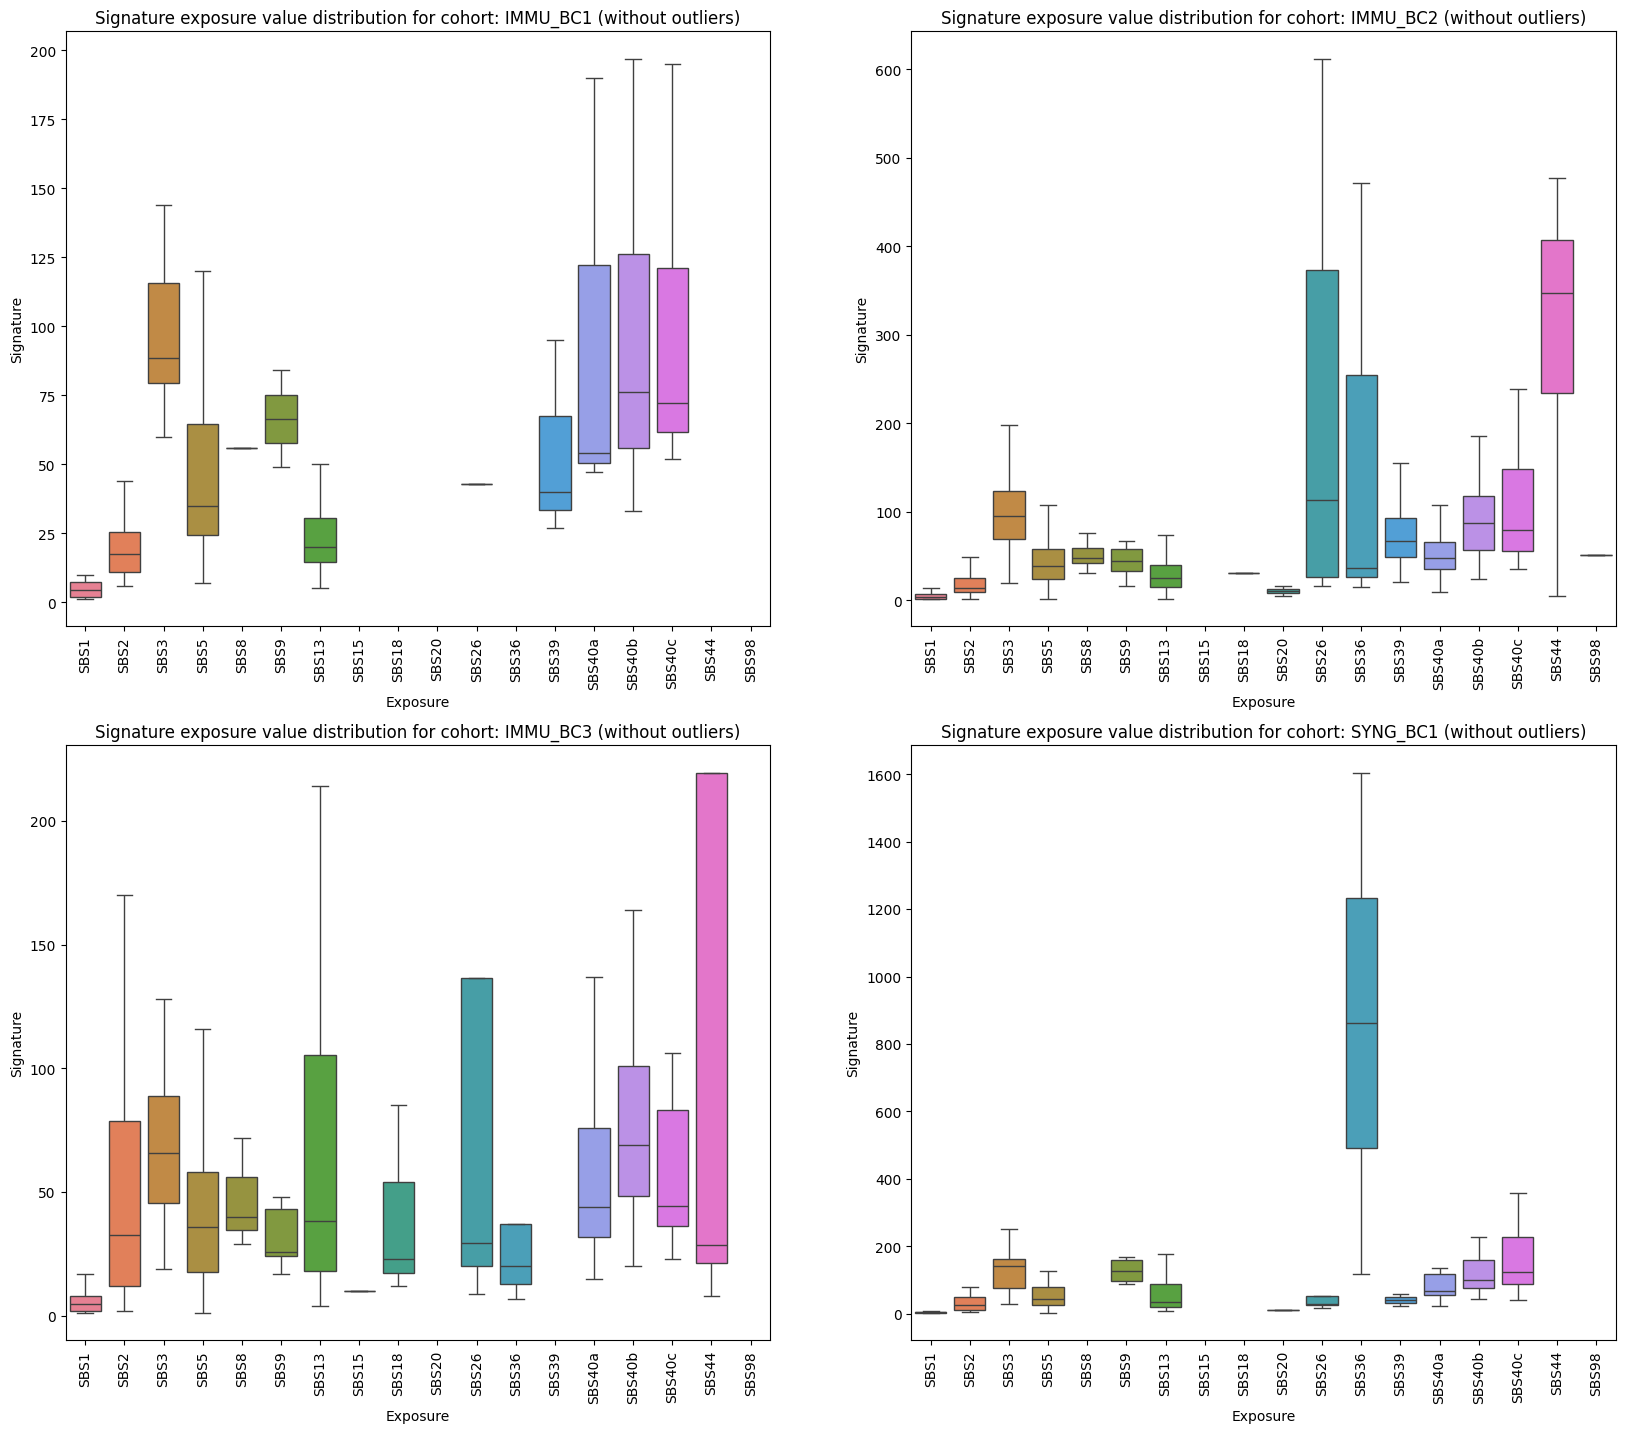

In [7]:
# Boxplot of signature exposure values for each cohort (without outliers)
fig, axs = plt.subplots(2,2, figsize=(20,17))

for ax, cohort, cohort_name in zip(axs.ravel(), samples_grouped, samples_grouped.index):
    sns.boxplot(data=signatures_merged_df_drop0.loc[cohort], orient='v', ax=ax, showfliers=False)
    ax.set_title(f'Signature exposure value distribution for cohort: {cohort_name} (without outliers)')
    ax.set_xlabel('Exposure')
    ax.set_ylabel('Signature')
    ax.tick_params(axis='x', labelrotation=90)

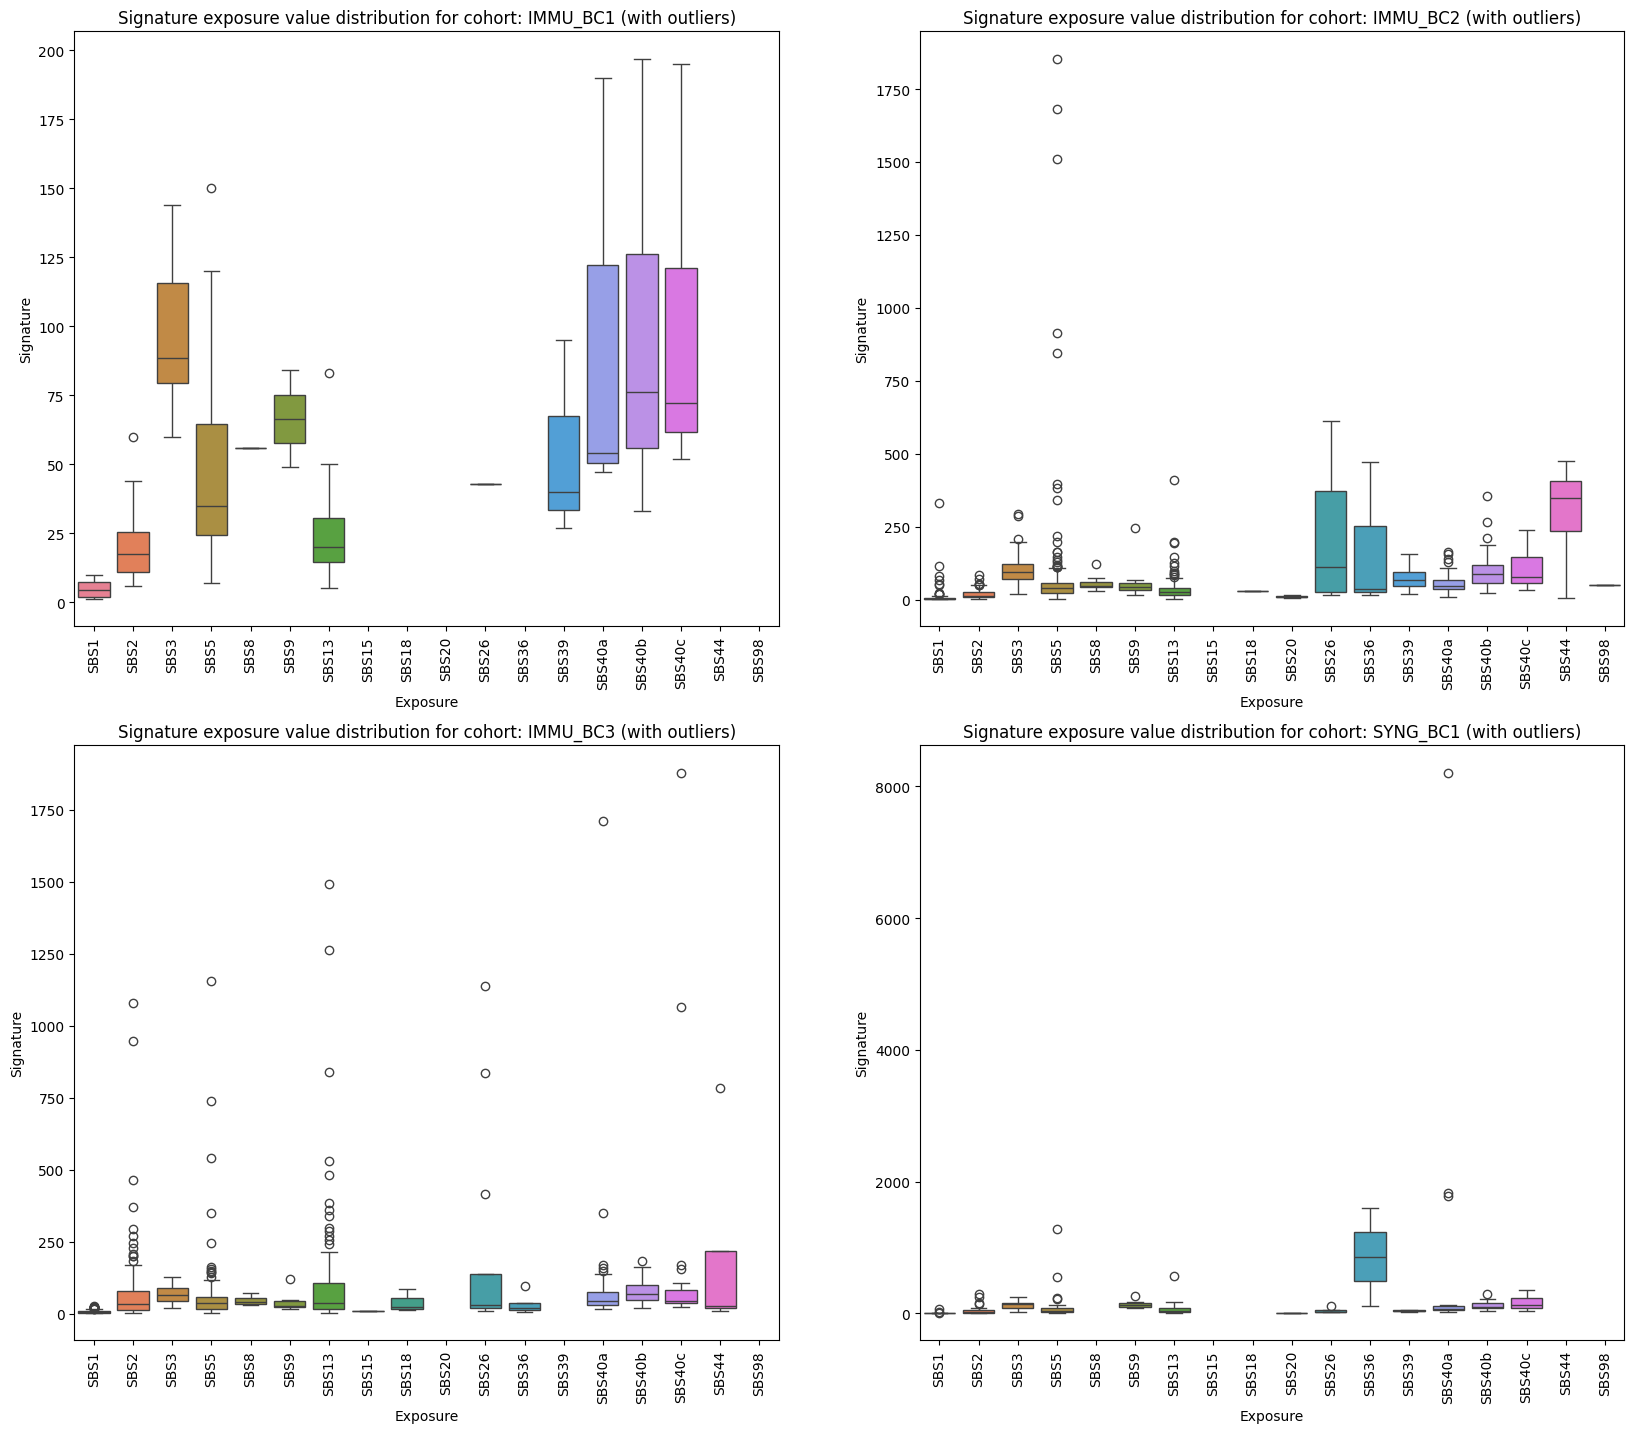

In [8]:
# Boxplot of signature exposure values for each cohort (with outliers)
fig, axs = plt.subplots(2,2, figsize=(20,17))

for ax, cohort, cohort_name in zip(axs.ravel(), samples_grouped, samples_grouped.index):
    sns.boxplot(data=signatures_merged_df_drop0.loc[cohort], orient='v', ax=ax)
    ax.set_title(f'Signature exposure value distribution for cohort: {cohort_name} (with outliers)')
    ax.set_xlabel('Exposure')
    ax.set_ylabel('Signature')
    ax.tick_params(axis='x', labelrotation=90)

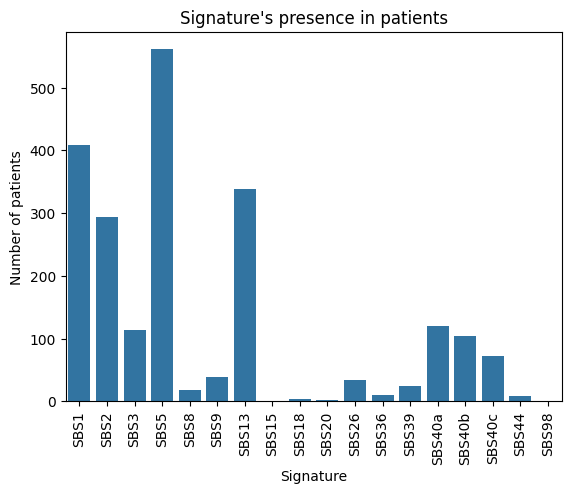

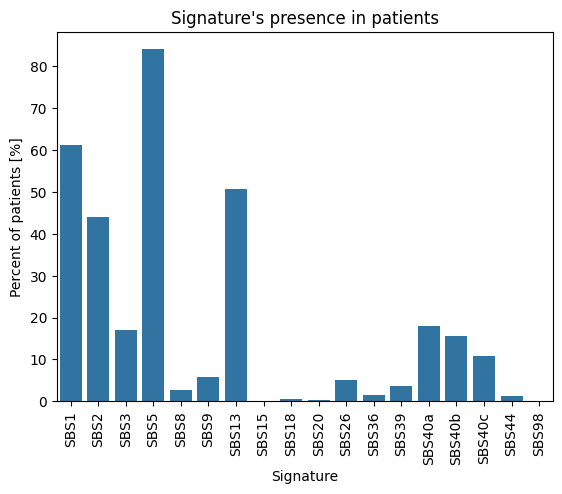

In [9]:
# Plot in how many patients is the signature present
sns.barplot((signatures_merged_df > 0).sum(axis=0))
plt.xticks(rotation=90)
plt.title('Signature\'s presence in patients')
plt.xlabel('Signature')
plt.ylabel('Number of patients')
plt.show();

# Plot in what percent of patients is the signature present
sns.barplot((signatures_merged_df > 0).sum(axis=0) / signatures_merged_df.shape[0] * 100)
plt.xticks(rotation=90)
plt.title('Signature\'s presence in patients')
plt.xlabel('Signature')
plt.ylabel('Percent of patients [%]')
plt.show()

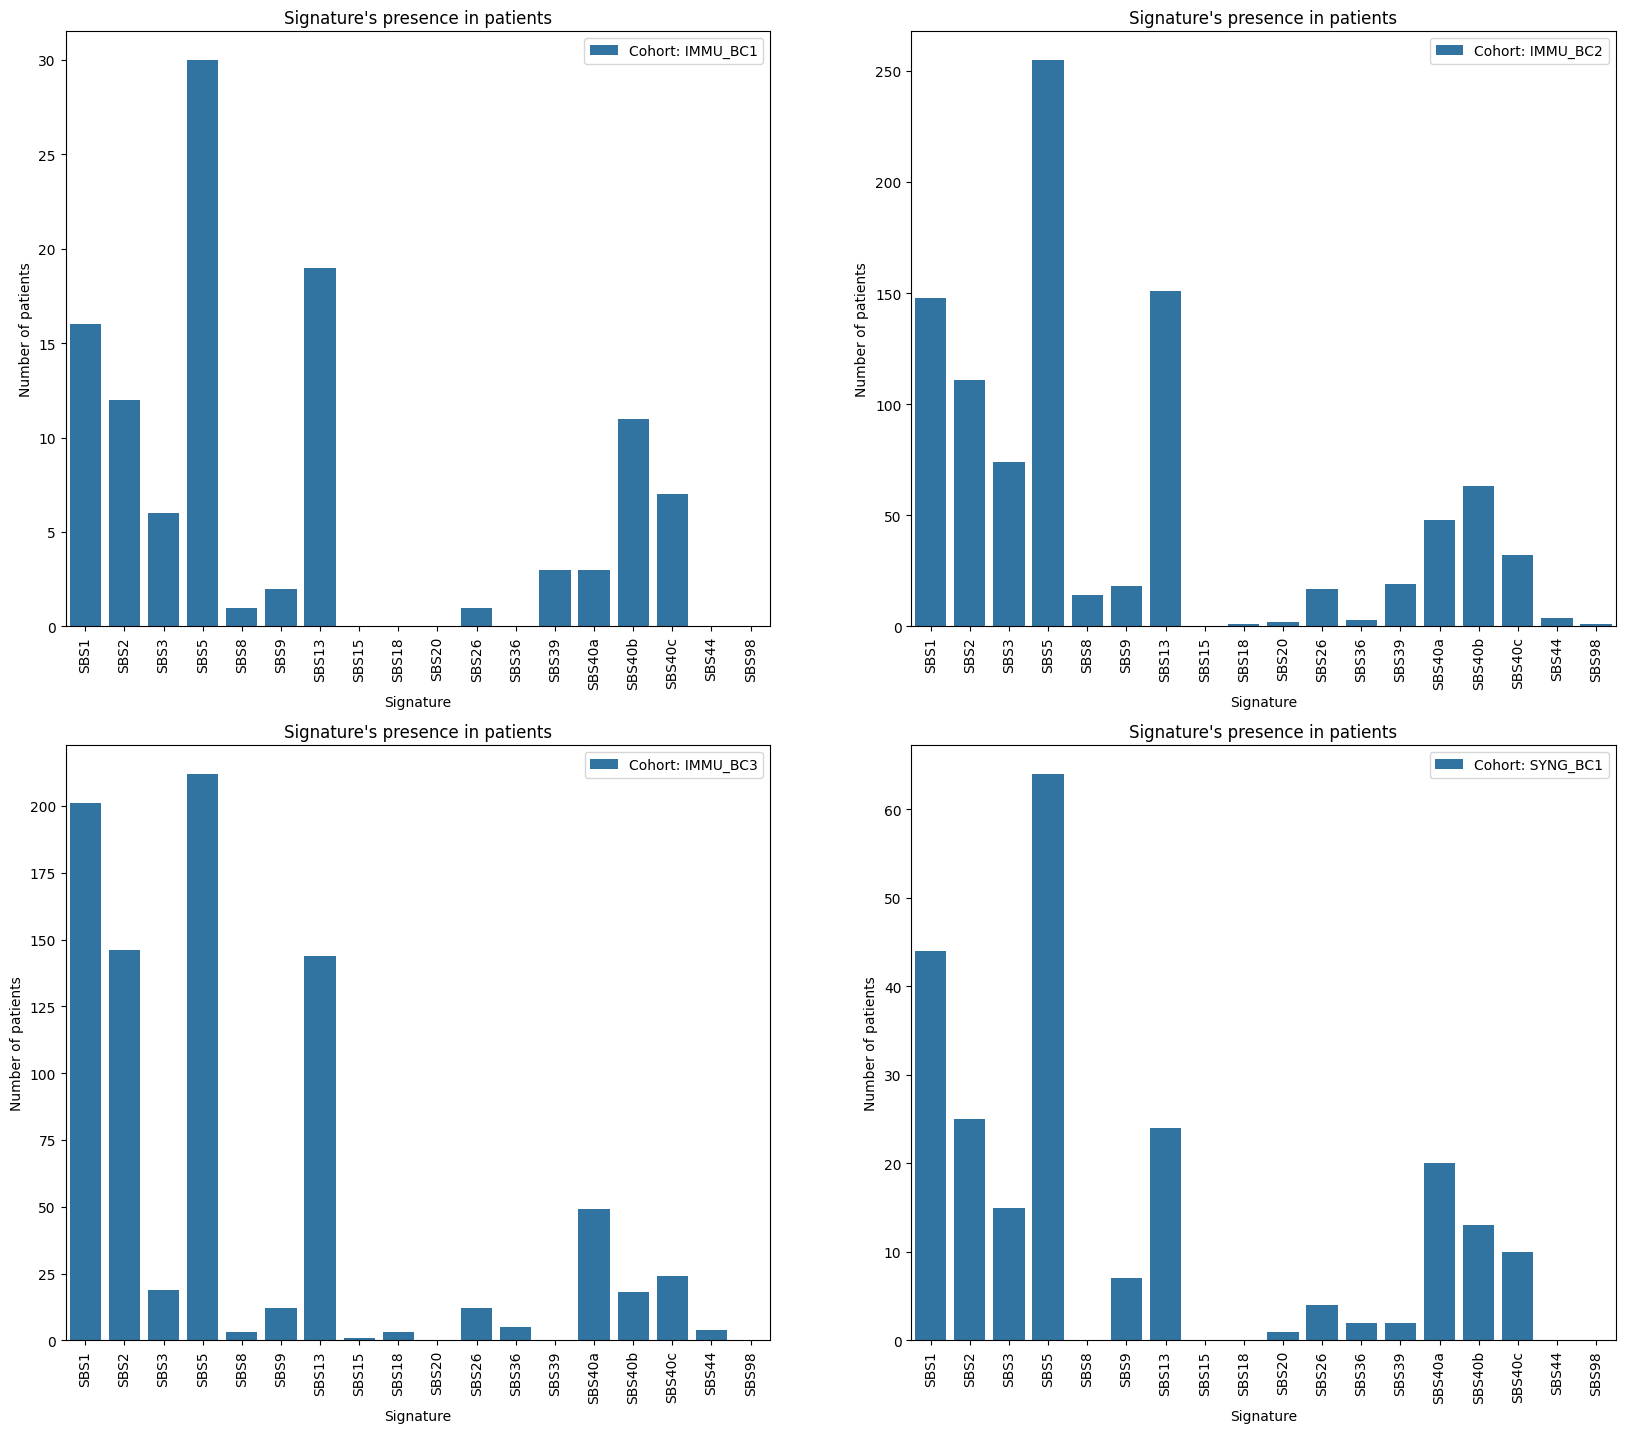

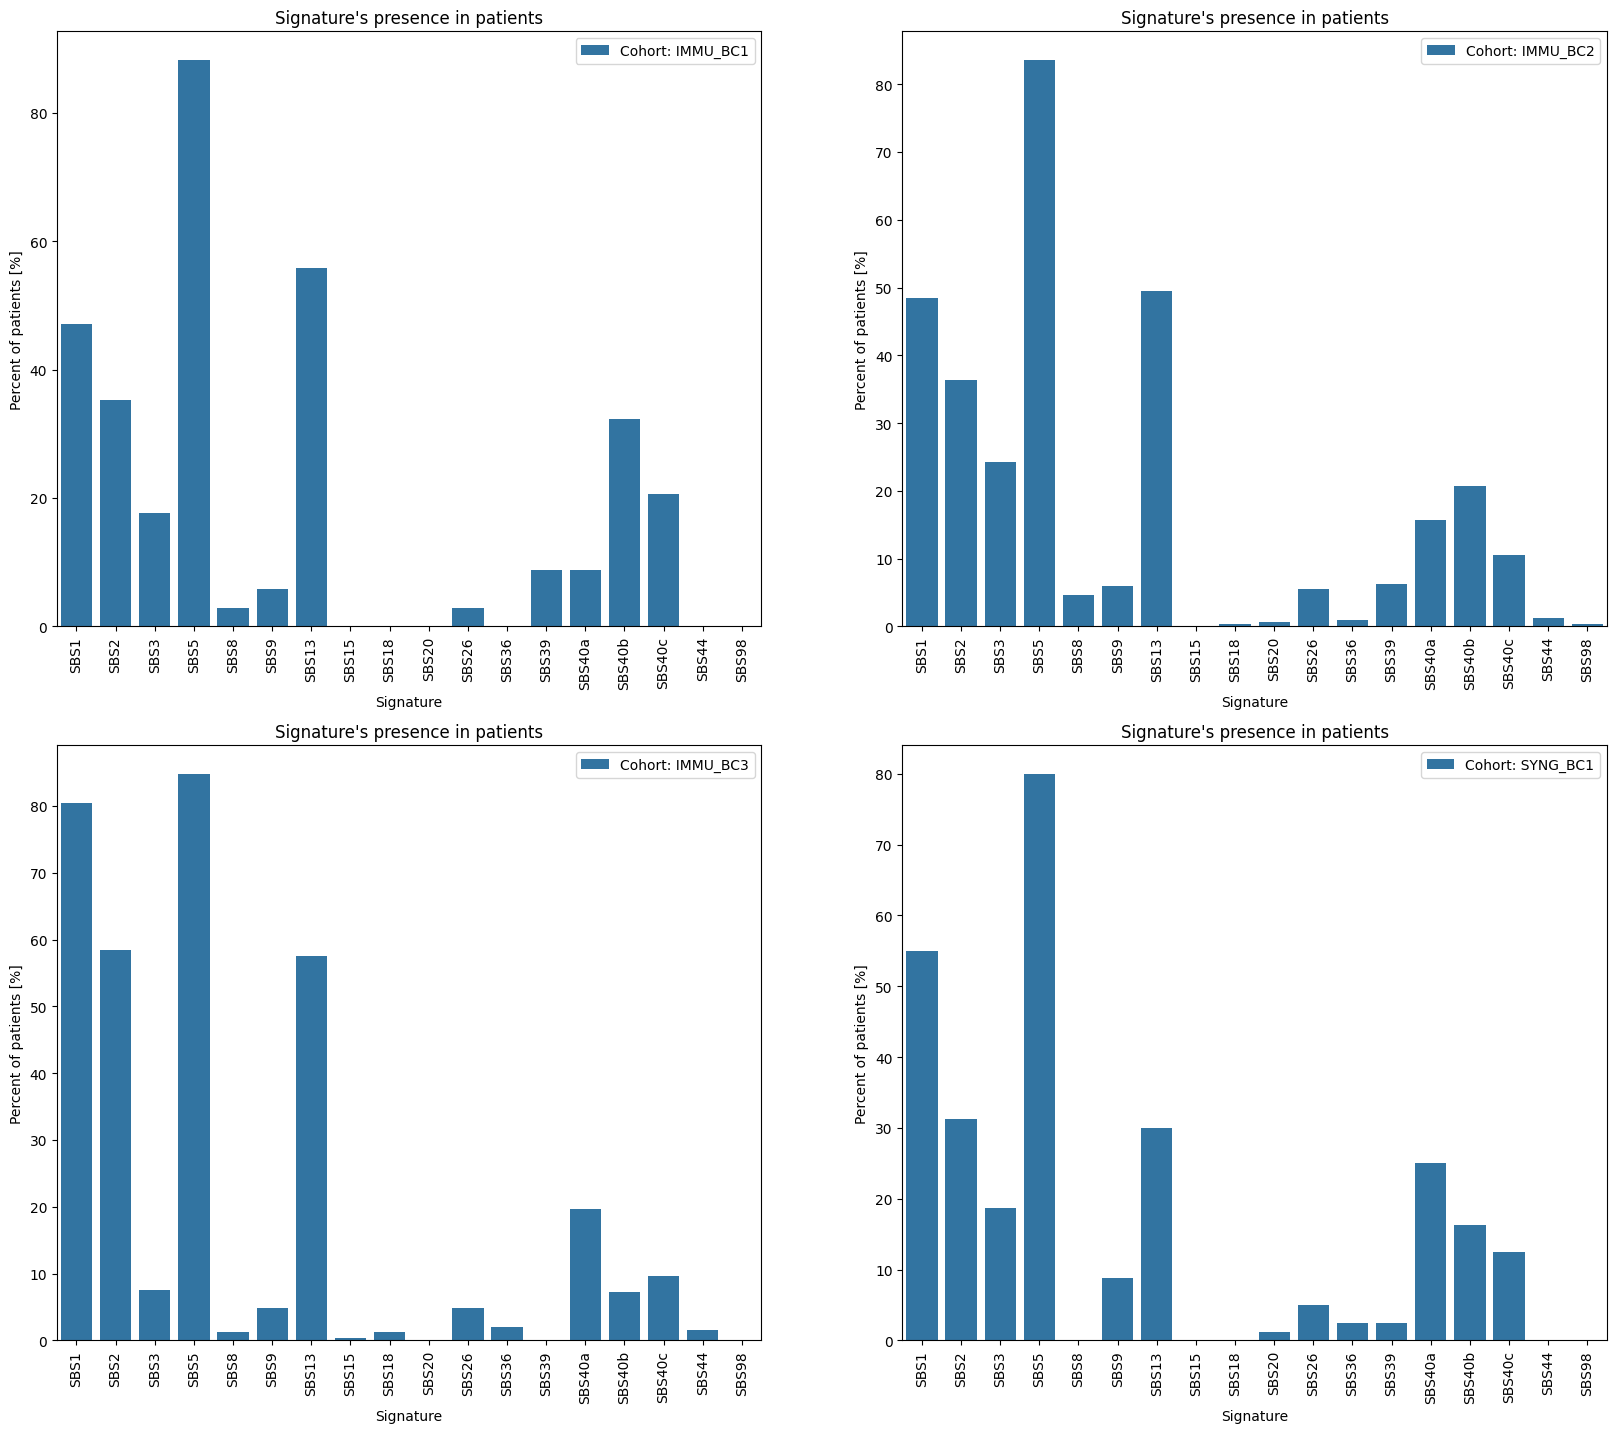

In [10]:
# Plot in how many patients is the signature present in each cohort
fig, axs = plt.subplots(2,2, figsize=(20,17))

for ax, cohort, cohort_name in zip(axs.ravel(), samples_grouped, samples_grouped.index):
    sns.barplot((signatures_merged_df.loc[cohort] > 0).sum(axis=0),
                ax=ax, label=f'Cohort: {cohort_name}')
    ax.set_title(f'Signature\'s presence in patients')
    ax.set_xlabel('Signature')
    ax.set_ylabel('Number of patients')
    ax.tick_params(axis='x', labelrotation=90)
    ax.legend()
print('');

# Plot in what percent of patients is the signature present in each cohort
fig, axs = plt.subplots(2,2, figsize=(20,17))

for ax, cohort, cohort_name in zip(axs.ravel(), samples_grouped, samples_grouped.index):
    sns.barplot((signatures_merged_df.loc[cohort] > 0).sum(axis=0) / signatures_merged_df.loc[cohort].shape[0] * 100,
                ax=ax, label=f'Cohort: {cohort_name}')
    ax.set_title(f'Signature\'s presence in patients')
    ax.set_xlabel('Signature')
    ax.set_ylabel('Percent of patients [%]')
    ax.tick_params(axis='x', labelrotation=90)
    ax.legend()

In [15]:
# Find patients with present signatures:
# - SBS36 (Defective base excision repair; MUTYH mutation)
# - SBS98

info_table_filepath = r'C:\Users\patap\Desktop\Escuela\UW\Praca\Projekt\Corr_analysis\expression_data\counts\info_table.tsv'
info_table = pd.read_csv(info_table_filepath, sep='\t', index_col=0)

SBS36_patients = signatures_merged_df.loc[signatures_merged_df['SBS36'] > 0].index
SBS98_patients = signatures_merged_df.loc[signatures_merged_df['SBS98'] > 0].index

print('SBS36 carrying patients:')
for patient in list(SBS36_patients): print(f'- {patient}')
print('SBS98 carrying patients:')
for patient in list(SBS98_patients): print(f'- {patient}')

SBS36 carrying patients:
- IMMU_BC2_0810_FIXT_01_XNA_01
- IMMU_BC2_1084_FIXT_01_XNA_01
- IMMU_BC2_1272_FIXT_01_XNA_01
- IMMU_BC3_0120_FIXT_01_XNA_01
- IMMU_BC3_0855_FIXT_01_XNA_01
- IMMU_BC3_0926_FIXT_01_XNA_01
- IMMU_BC3_1040_FIXT_01_XNA_01
- IMMU_BC3_2012_FIXT_01_XNA_01
- SYNG_BC1_1545_FIXT_01_XNA_01
- SYNG_BC1_1554_FIXT_01_XNA_01
SBS98 carrying patients:
- IMMU_BC2_0430_FIXT_01_XNA_01


# De novo 

In [ ]:
# from SigProfilerExtractor import sigpro as sig

# sig.sigProfilerExtractor("matrix", "denovo_results", "results/mutations_data_clean_merged.tsv",
#                          reference_genome="GRCh38", minimum_signatures=1,
#                          maximum_signatures=10, nmf_replicates=100, cpu=-1)


************** Reported Current Memory Use: 0.72 GB *****************

Extracting signature 1 for mutation type 96
The matrix normalizing cutoff is 9600


Time taken to collect 100 iterations for 1 signatures is 957.5 seconds
Optimization time is 7.092006683349609 seconds
The reconstruction error is 0.7435, average process stability is 1.0 and 
the minimum process stability is 1.0 for 1 signatures


Extracting signature 2 for mutation type 96
The matrix normalizing cutoff is 9600


Time taken to collect 100 iterations for 2 signatures is 1091.04 seconds
Optimization time is 8.343591451644897 seconds
The reconstruction error is 0.5771, average process stability is 1.0 and 
the minimum process stability is 1.0 for 2 signatures


Extracting signature 3 for mutation type 96
The matrix normalizing cutoff is 9600


Time taken to collect 100 iterations for 3 signatures is 2628.35 seconds
Optimization time is 7.71674656867981 seconds
The reconstruction error is 0.3216, average process stabili

In [ ]:
# Analyze.denovo_fit(samples='data/mutations_data_clean_merged.tsv',
#                    output='results_denovo',
#                    input_type='matrix',
#                    signatures="path/to/input/denovo/signatures/file",
#                    genome_build="GRCh37")

In [69]:
# Import decomposed de novo signature exposures
filepath = r'denovo_results\SBS96\Suggested_Solution\COSMIC_SBS96_Decomposed_Solution\Activities\COSMIC_SBS96_Activities.txt'
denovo_decomp_sig_df = pd.read_csv(filepath, sep='\t', index_col=0)
denovo_decomp_sig_df

,SBS1,SBS2,SBS4,SBS5,SBS12,SBS13,SBS18,SBS19,SBS30,SBS32,SBS39
Samples,,,,,,,,,,,
IMMU_BC1_0164_FIXT_01_XNA_01,5,0,0,295,0,0,0,0,0,0,133
IMMU_BC1_0191_FIXT_03_XNA_01,7,0,0,46,29,0,0,0,0,0,129
IMMU_BC1_0213_FIXT_01_XNA_01,0,12,43,80,0,13,0,0,0,0,32
IMMU_BC1_0248_FIXT_01_XNA_01,5,10,0,21,0,0,0,14,0,0,27
IMMU_BC1_0297_FIXT_02_XNA_01,18,14,0,45,32,0,0,27,0,0,69
...,...,...,...,...,...,...,...,...,...,...,...
SYNG_BC1_1599_FIXT_01_XNA_01,85,29,0,64,0,0,0,0,0,0,0
SYNG_BC1_1600_FIXT_01_XNA_01,12,0,0,39,0,0,0,25,0,78,0
SYNG_BC1_1601_FIXT_01_XNA_01,7,50,0,82,0,79,0,0,0,0,0


In [75]:
denovo_decomp_sig_df_drop0 = denovo_decomp_sig_df[denovo_decomp_sig_df > 0]

Text(0, 0.5, 'Signature')

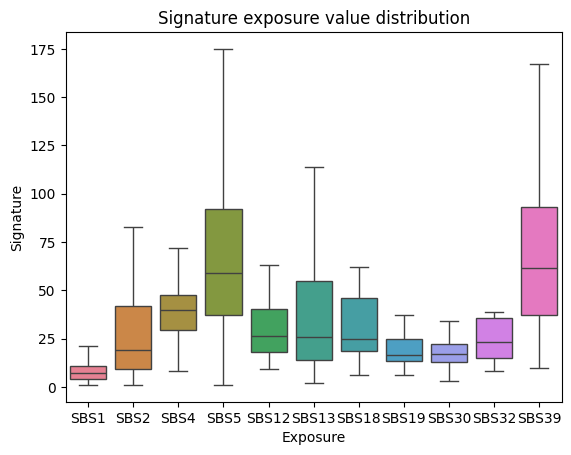

In [76]:
# Boxplot of signature exposure values (without outliers)
sns.boxplot(data=denovo_decomp_sig_df_drop0, orient='v', showfliers=False)
plt.title('Signature exposure value distribution')
plt.xlabel('Exposure')
plt.ylabel('Signature')

Text(0, 0.5, 'Signature')

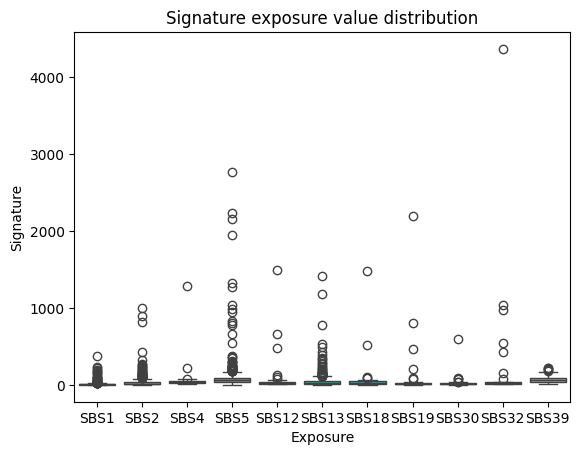

In [77]:
# Boxplot of signature exposure values (with outliers)
sns.boxplot(data=denovo_decomp_sig_df_drop0, orient='v')
plt.title('Signature exposure value distribution')
plt.xlabel('Exposure')
plt.ylabel('Signature')

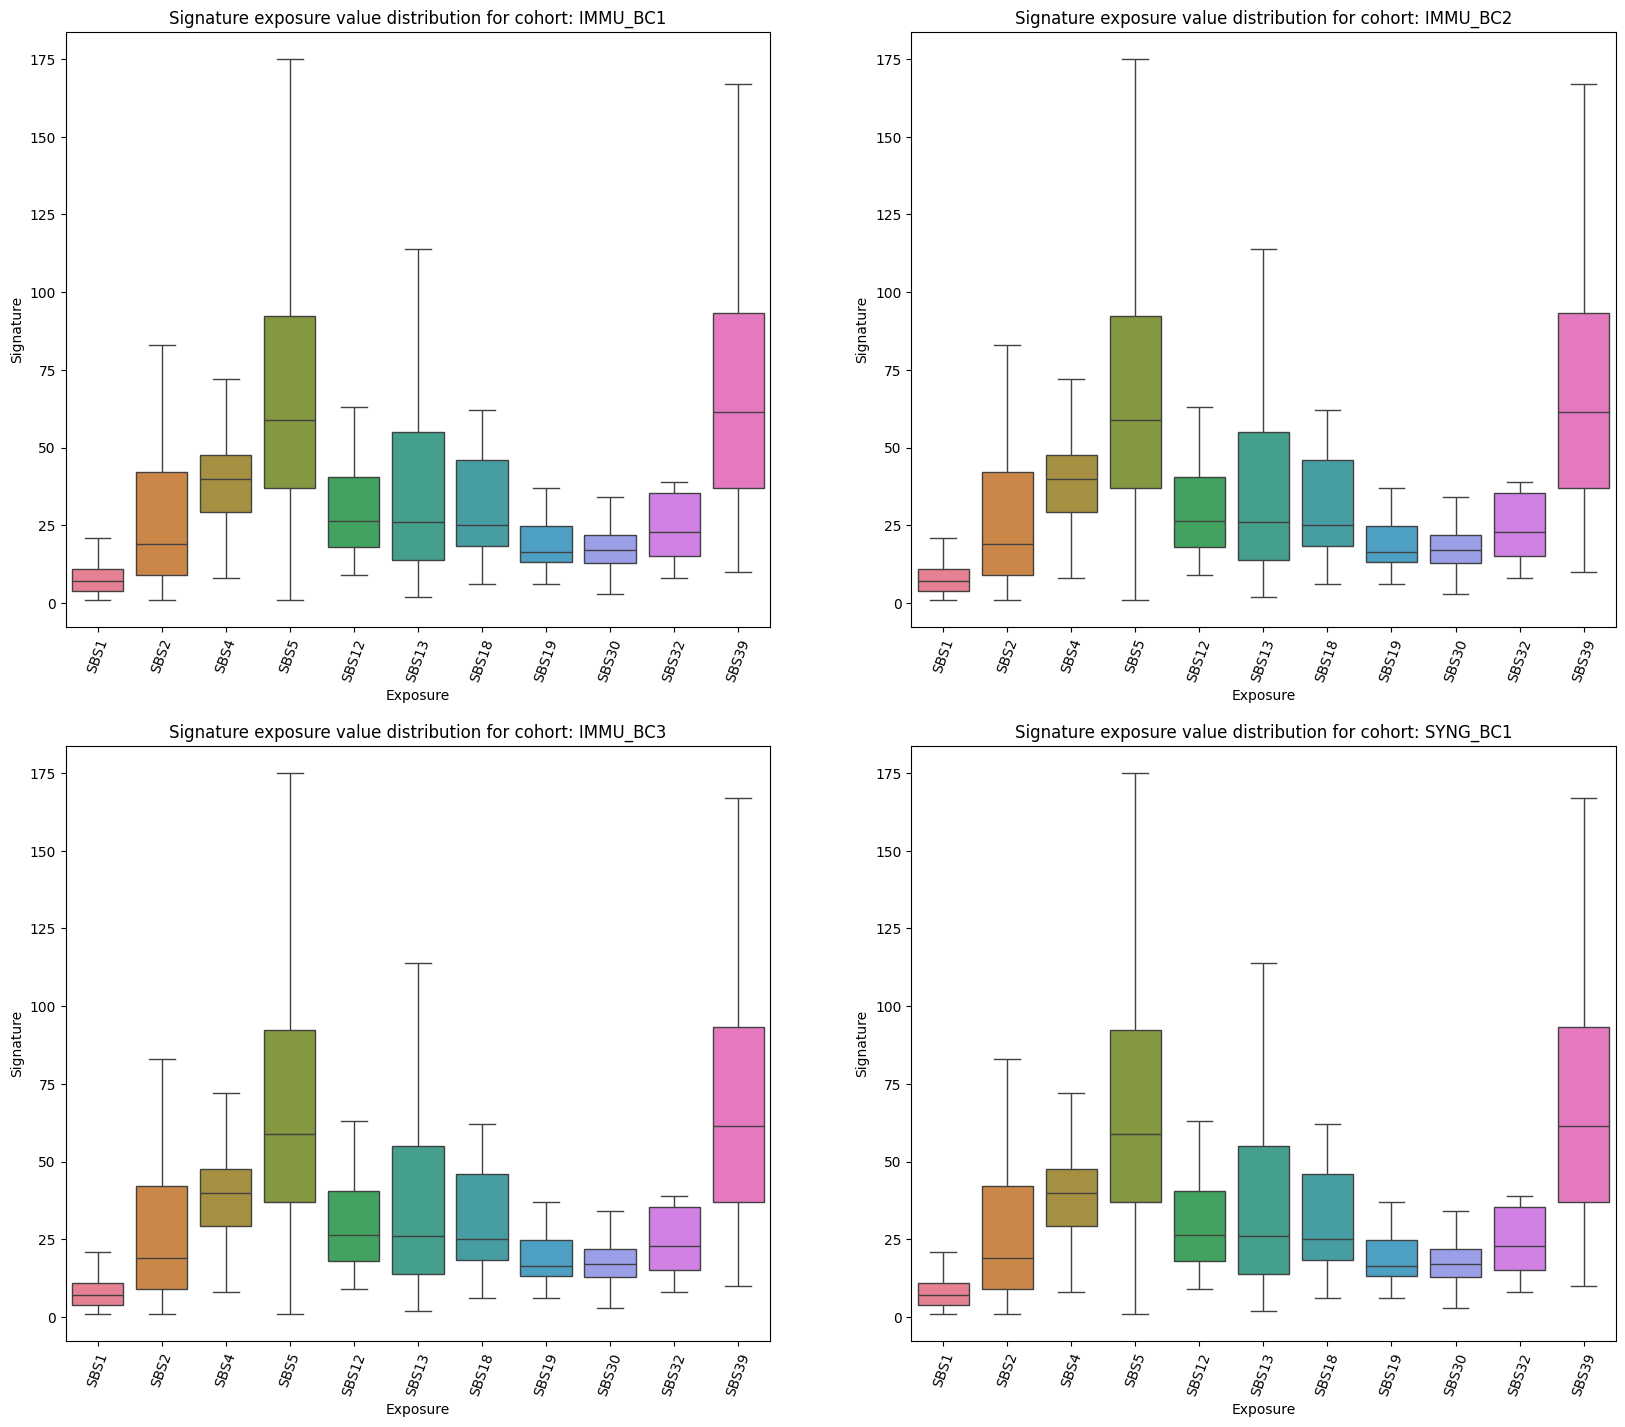

In [79]:
# Boxplot of signature exposure values for each cohort (without outliers)
fig, axs = plt.subplots(2,2, figsize=(20,17))

for ax, cohort, cohort_name in zip(axs.ravel(), samples_grouped, samples_grouped.index):
    sns.boxplot(data=denovo_decomp_sig_df_drop0, orient='v', ax=ax, showfliers=False)
    ax.set_title(f'Signature exposure value distribution for cohort: {cohort_name}')
    ax.set_xlabel('Exposure')
    ax.set_ylabel('Signature')
    ax.tick_params(axis='x', labelrotation=70)

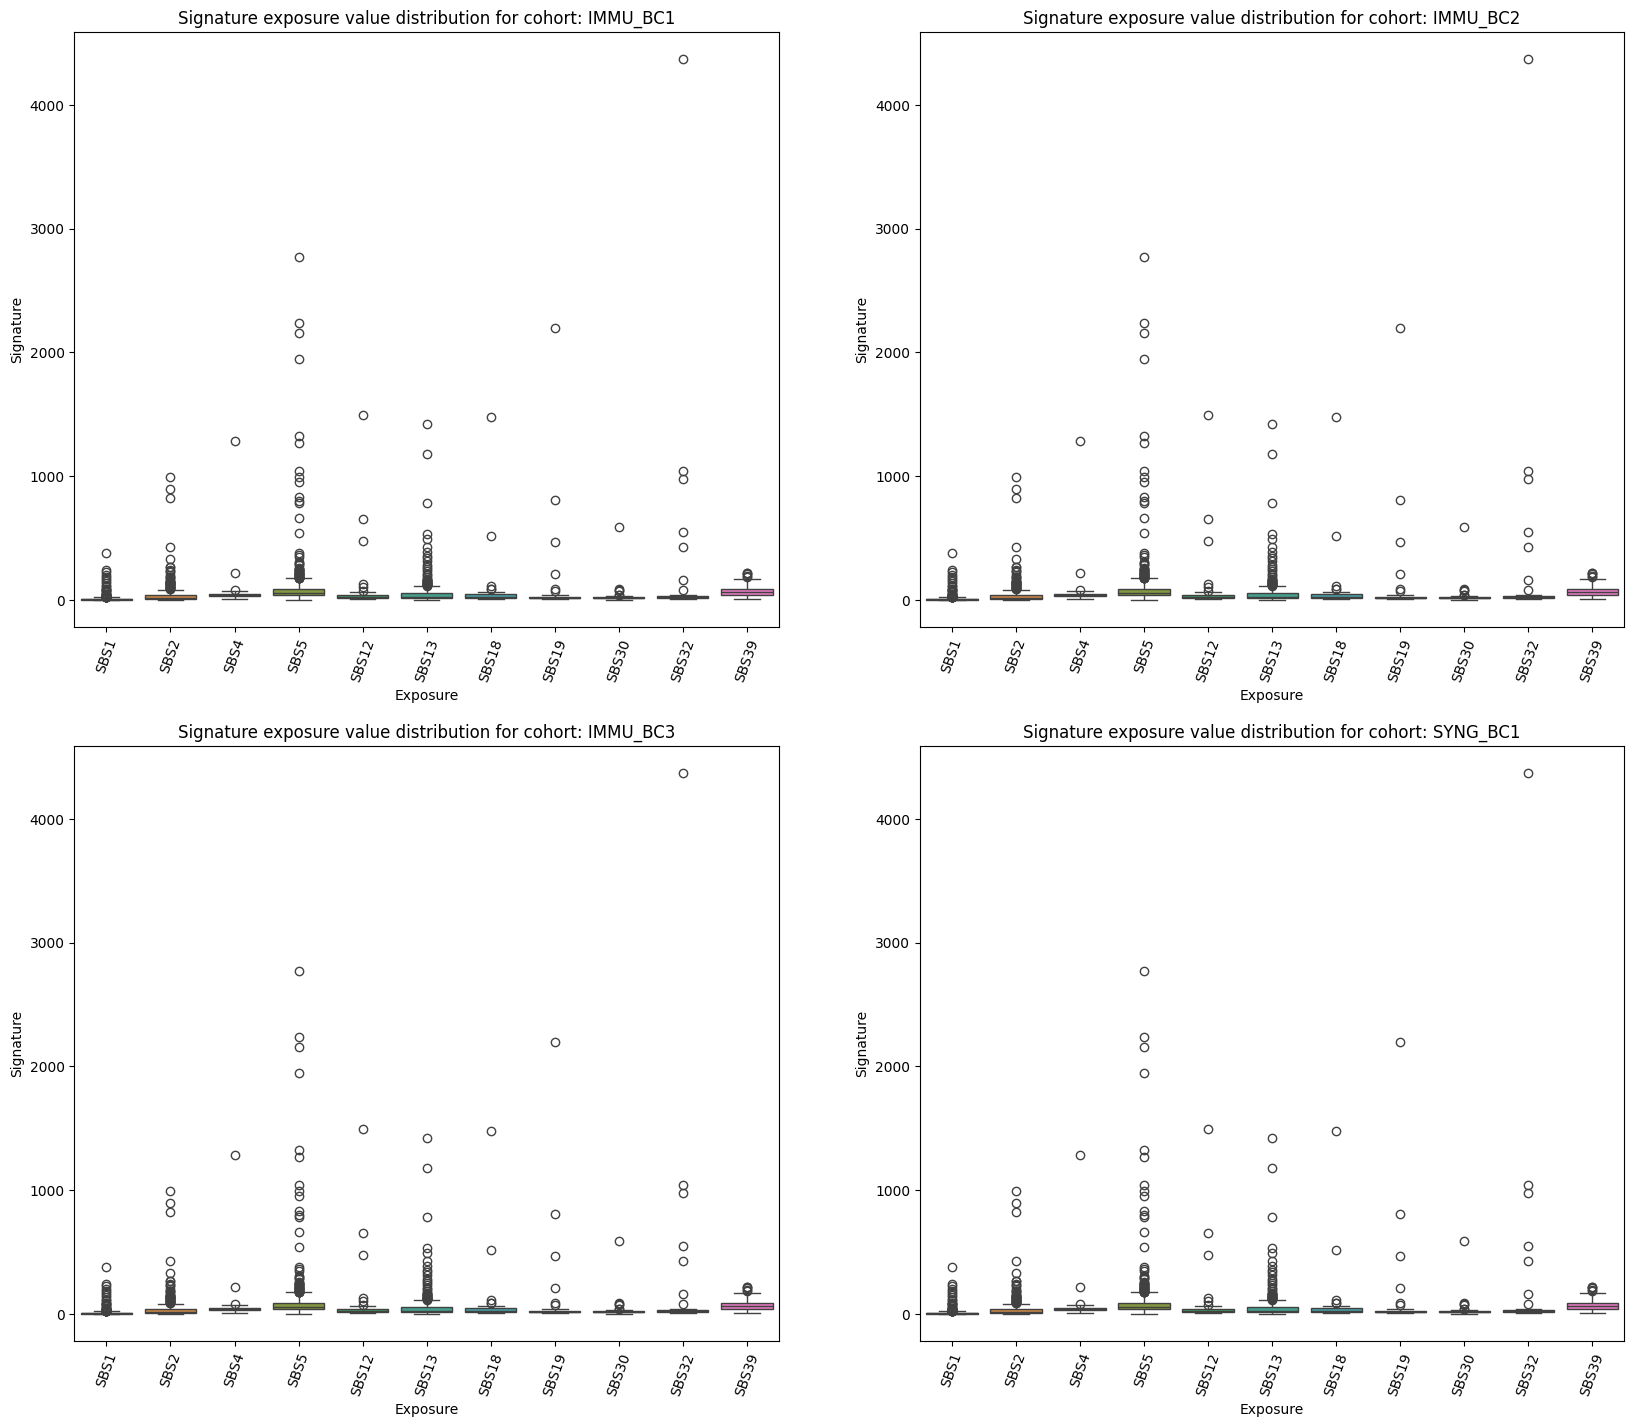

In [80]:
# Boxplot of signature exposure values for each cohort (with outliers)
fig, axs = plt.subplots(2,2, figsize=(20,17))

for ax, cohort, cohort_name in zip(axs.ravel(), samples_grouped, samples_grouped.index):
    sns.boxplot(data=denovo_decomp_sig_df_drop0, orient='v', ax=ax)
    ax.set_title(f'Signature exposure value distribution for cohort: {cohort_name}')
    ax.set_xlabel('Exposure')
    ax.set_ylabel('Signature')
    ax.tick_params(axis='x', labelrotation=70)

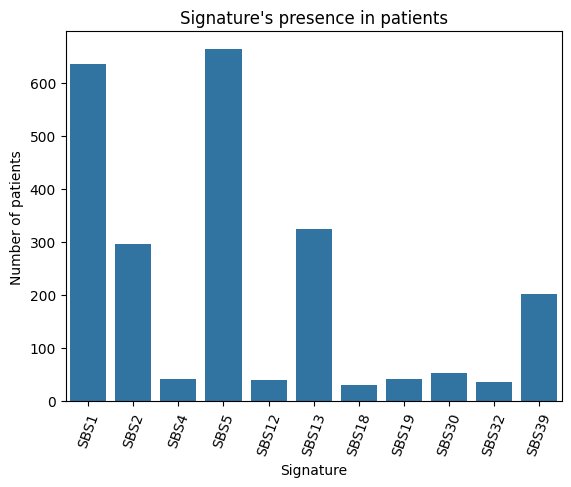

In [74]:
# Plot in how many patients is the signature present
sns.barplot((denovo_decomp_sig_df > 0).sum(axis=0))
plt.xticks(rotation=70)
plt.title('Signature\'s presence in patients')
plt.xlabel('Signature')
plt.ylabel('Number of patients')
plt.show()

C:\Users\patap\AppData\Local\Temp\ipykernel_3064\1525091781.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(denovo_decomp_sig_df.columns, rotation=70)
C:\Users\patap\AppData\Local\Temp\ipykernel_3064\1525091781.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(denovo_decomp_sig_df.columns, rotation=70)
C:\Users\patap\AppData\Local\Temp\ipykernel_3064\1525091781.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(denovo_decomp_sig_df.columns, rotation=70)
C:\Users\patap\AppData\Local\Temp\ipykernel_3064\1525091781.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(denovo_deco

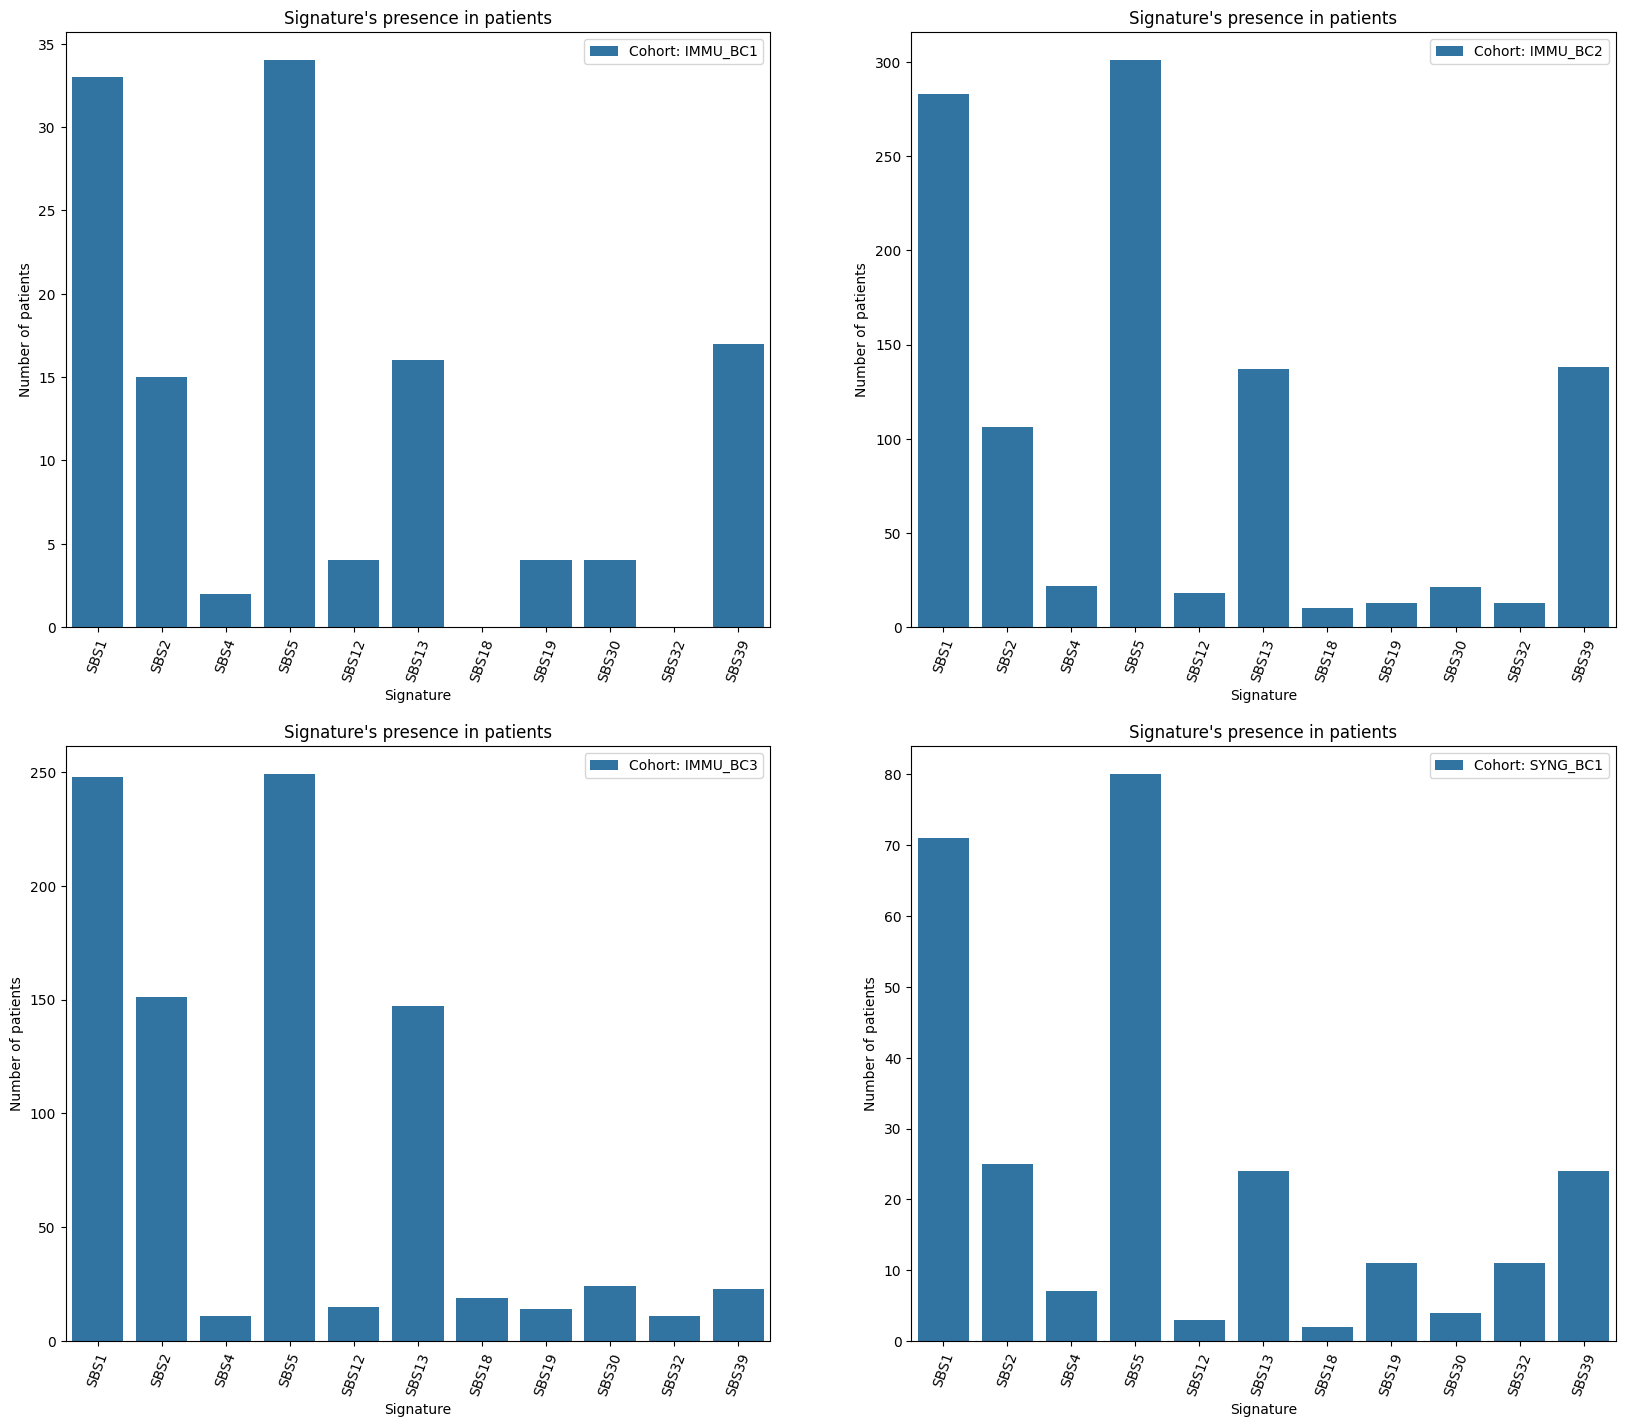

In [22]:
# Plot in how many patients is the signature present in each cohort
fig, axs = plt.subplots(2,2, figsize=(20,17))

for ax, cohort, cohort_name in zip(axs.ravel(), samples_grouped, samples_grouped.index):
    sns.barplot((denovo_decomp_sig_df.T[cohort] > 0).sum(axis=1), ax=ax, label=f'Cohort: {cohort_name}')
    ax.set_title(f'Signature\'s presence in patients')
    ax.set_xlabel('Signature')
    ax.set_ylabel('Number of patients')
    ax.tick_params(axis='x', labelrotation=70)
    ax.legend()